<a href="https://www.kaggle.com/code/hkcs1206/mla-linearregression?scriptVersionId=117029343" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goldpriceyahoo/MonthWise2022(Yahoo).csv
/kaggle/input/goldpriceyahoo/DateWiseDec2022(Yahoo).csv
/kaggle/input/goldpriceyahoo/YearWise2012-2022(Yahoo).csv


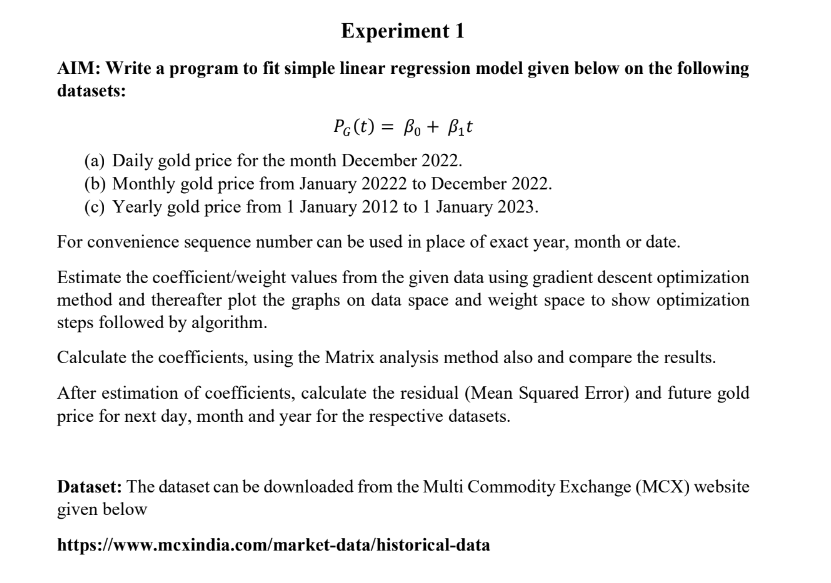

# Linear Regressiong using Gradient Decent :

In [2]:
class Linear_Regression():
  # Initiating Parameters(learning_rate,no_of_iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
  # No_of_training_example(No of data points) and number of features()
    self.m,self.n = X.shape #no of rows and colomn
  # Initiating weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

  # Implementing Gradient Decent
    for i in range(self.no_of_iterations):
      self.updateWeight()



  def updateWeight(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
  
  def predict(self,X):
    return X.dot(self.w) + self.b

# Here, we will fit all data points (MonthWise) using Linear Regression

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# Gold Rate Data
goldMonth = pd.read_csv('/kaggle/input/goldpriceyahoo/MonthWise2022(Yahoo).csv')

In [5]:
goldMonth.head()

,Month,Price
0,1,1795.0
1,2,1899.4
2,3,1949.2
3,4,1909.3
4,5,1804.1


In [6]:
goldMonth.shape

(11, 2)

In [7]:
# Split In X and Y (Feature V/S Target)
X = goldMonth.iloc[:,:-1].values
Y = goldMonth.iloc[:,1].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [9]:
Y

array([1795. , 1899.4, 1949.2, 1909.3, 1804.1, 1762.9, 1712.8, 1662.4,
       1635.9, 1746. , 1819.7])

In [10]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [11]:
model.fit(X,Y)

In [12]:
# print the parameters

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  -14.938759512448184
bias =  1874.7281798430427


In [13]:
test_data_prediction = model.predict(X)

In [14]:
print(test_data_prediction)

[1859.78942033 1844.85066082 1829.91190131 1814.97314179 1800.03438228
 1785.09562277 1770.15686326 1755.21810374 1740.27934423 1725.34058472
 1710.40182521]


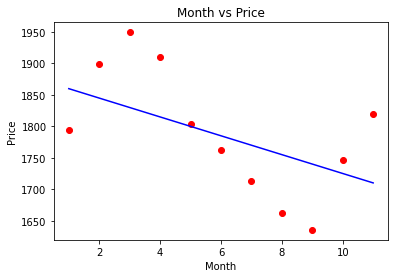

In [15]:
plt.scatter( X, Y, color = 'red' )
plt.plot( X, test_data_prediction, color = 'blue' )    
plt.xlabel( 'Month' )
plt.ylabel( 'Price' )
plt.title( 'Month vs Price' )
plt.show()

In [16]:
# Calculating MSE for Year Wise
y = Y.tolist()
y_bar = test_data_prediction.tolist()
summation = 0  #variable to store the summation of differences
n = len(y) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  5998.421916268396


# Matrix Analysis

In [17]:
class Matrix_Analysis:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        

In [18]:
model2 = Matrix_Analysis()

In [19]:
model2.fit(X,Y)
# We got Almost Same values for weights and Bias [(1874.72,-14.93) we got in GD Model)

1900.5236363636352 [-18.31909091]


# Now, we will do for DayWise Data of December 2022

In [20]:
# Gold Rate Data
goldDay = pd.read_csv('/kaggle/input/goldpriceyahoo/DateWiseDec2022(Yahoo).csv')

In [21]:
goldDay.head()

,Date,Price
0,1,1801.1
1,2,1795.9
2,3,1767.4
3,4,1769.3
4,5,1785.5


In [22]:
goldDay.shape

(21, 2)

In [23]:
X = goldDay.iloc[:,:-1].values
Y = goldDay.iloc[:,1].values


In [24]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21]])

In [25]:
Y

array([1801.1, 1795.9, 1767.4, 1769.3, 1785.5, 1788.7, 1798.1, 1780.5,
       1813.9, 1807.5, 1777.2, 1790. , 1787.7, 1815.9, 1815.9, 1787. ,
       1795.9, 1814.8, 1807.9, 1819.5, 1819.7])

In [26]:
model = Linear_Regression(learning_rate=0.001, no_of_iterations=15000)

In [27]:
model.fit(X,Y)

In [28]:
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  1.6807155304026469
bias =  1778.23130137244


In [29]:
test_data_prediction = model.predict(X)

In [30]:
test_data_prediction


array([1779.9120169 , 1781.59273243, 1783.27344796, 1784.95416349,
       1786.63487902, 1788.31559455, 1789.99631009, 1791.67702562,
       1793.35774115, 1795.03845668, 1796.71917221, 1798.39988774,
       1800.08060327, 1801.7613188 , 1803.44203433, 1805.12274986,
       1806.80346539, 1808.48418092, 1810.16489645, 1811.84561198,
       1813.52632751])

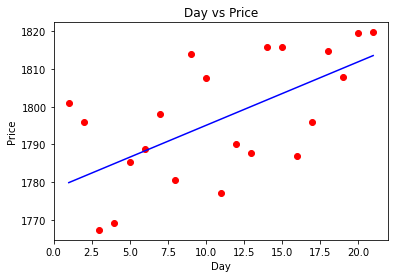

In [31]:
plt.scatter( X, Y, color = 'red' )
plt.plot( X, test_data_prediction, color = 'blue' )    
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.title( 'Day vs Price' )
plt.show()

In [32]:
# Calculating MSE for Day Wise
y = Y.tolist()
y_bar = test_data_prediction.tolist()
summation = 0  #variable to store the summation of differences
n = len(y) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  165.18738917730167


In [33]:
model2 = Matrix_Analysis()

In [34]:
model2.fit(X,Y)
# We got Almost Same values for weights and Bias [(1778.23,1.68) we got in GD Model)

1779.9385714285713 [1.56142857]


# Now, we will do for YearWise Data of 2012-2022

In [35]:
# Gold Rate Data
goldYear = pd.read_csv('/kaggle/input/goldpriceyahoo/YearWise2012-2022(Yahoo).csv')

In [36]:
goldYear.head()

,Year,Price
0,1,1472.2
1,2,1240.1
2,3,1278.5
3,4,1116.4
4,5,1252.6


In [37]:
goldYear.shape

(10, 2)

In [38]:
# Split In X and Y (Feature V/S Target)
X = goldYear.iloc[:,:-1].values
Y = goldYear.iloc[:,1].values

In [39]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [40]:
Y

array([1472.2, 1240.1, 1278.5, 1116.4, 1252.6, 1339. , 1319.7, 1582.9,
       1847.3, 1795. ])

In [41]:
model.fit(X,Y)

In [42]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  57.09658222864779
bias =  1109.9220803124103


In [43]:
test_data_prediction = model.predict(X)

In [44]:
test_data_prediction

array([1167.01866254, 1224.11524477, 1281.211827  , 1338.30840923,
       1395.40499146, 1452.50157368, 1509.59815591, 1566.69473814,
       1623.79132037, 1680.8879026 ])

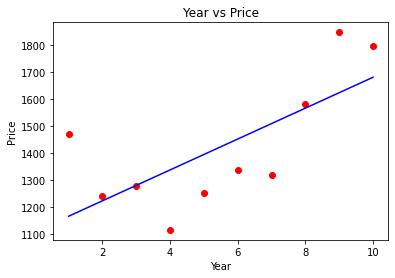

In [45]:
plt.scatter( X, Y, color = 'red' )
plt.plot( X, test_data_prediction, color = 'blue' )    
plt.xlabel( 'Year' )
plt.ylabel( 'Price' )
plt.title( 'Year vs Price' )
plt.show()

In [46]:
# Calculating MSE for Year Wise
y = Y.tolist()
y_bar = test_data_prediction.tolist()
summation = 0  #variable to store the summation of differences
n = len(y) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  27521.935081194424


In [47]:
model2 = Matrix_Analysis()

In [48]:
model2.fit(X,Y) 
# We got Almost Same values for weights and Bias [(1109.9,57.09) we got in GD Model)

1111.9066666666668 [56.81151515]
